# 다중 선형회귀 파이토치 모델 구축

## 1. 데이터 정의

### 1.1 데이터 불러오기

In [4]:
# 라이브러리 설치
import numpy as np
loaded_data=np.loadtxt('LEC06_TrainData.csv', delimiter=',')

In [5]:
#학습할 설명변수 x,y 구조 설계하기

x_train_np = loaded_data[ : , 0:-1] #모든행에 대해서, 마지막 열 앞까지만 
y_train_np = loaded_data[ : , [-1]] #모든행에 대해서, 마지막 열만 추출

print(loaded_data[:3])
print("==============")
print(x_train_np[:3])
print("==============")
print(y_train_np[:3])

[[ 1.  2.  0. -4.]
 [ 5.  4.  3.  4.]
 [ 1.  2. -1. -6.]]
[[ 1.  2.  0.]
 [ 5.  4.  3.]
 [ 1.  2. -1.]]
[[-4.]
 [ 4.]
 [-6.]]


### 1.2 텐서 데이터로 변환

In [7]:
#1. 파이토치 데이터셋 구성 - 데이터를 파이토치 딥러닝 단위인 tensor로 변환시켜줘야 함!
import torch
from torch import nn

x_train=torch.Tensor(x_train_np) #넘파이로부터 파이토치 생성
y_train=torch.Tensor(y_train_np)

## 2. 신경망 모델 구축

### 2.1 모델 설계 (Layers, forward 정의)

In [10]:
# 2. 파이토치 선형회귀 모델 구축
from torch import nn

class MyLinearRegressionModel(nn.Module):

    def __init__(self, input_nodes):
        super().__init__()
        self.linear_stack = nn.Sequential(
            nn.Linear(input_nodes, 1) ## (nn.Linear 계층 입력 데이터 노드 수, 출력 데이터 노드 수=1)
        )

    def forward(self, data):
        prediction = self.linear_stack(data)

        return prediction

In [11]:
model = MyLinearRegressionModel(3) ## 괄호 안의 3은, 입력 데이터가 3개인 선형회귀 모델 인스턴스 생성

for name, child in model.named_children(): # 모델 파라미터 (가중치, 바이어스 초기 값 확인해보기)
    for param in child.parameters():
        print(name,param)

linear_stack Parameter containing:
tensor([[-0.2570,  0.0832, -0.0323]], requires_grad=True)
linear_stack Parameter containing:
tensor([0.4282], requires_grad=True)


### 2.2 손실함수/옵티마이저 설정

In [13]:
## 3. 손실함수 옵티마이저 설정

loss_function=nn.MSELoss() #선형회귀 문제이므로 손실함수는 평균제곱오차인 nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=1e-2) #옵티마이저는 확률적 경사하강법 SGD 차용

### 2.3 학습

In [15]:
## 4. 학습 (Learning)
loss_list = []
nums_epoch = 20000

for epoch in range(nums_epoch+1):

    prediction = model(x_train) #mode에 데이터를 전달하면 modelclassdml forward함수가 자동 ㄹ행
    loss = loss_function(prediction, y_train) #선형회귀 모델의 예측값과, 정답과의 오차 계산

    loss_list.append(loss.item())

    # 역전파 코드 3종세트
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #중간 출력값 
    if epoch % 100 == 0:
        print('epoch = ', epoch, ' current loss = ', loss.item())

epoch =  0  current loss =  26.092641830444336
epoch =  100  current loss =  0.19461707770824432
epoch =  200  current loss =  0.008736503310501575
epoch =  300  current loss =  0.002504696836695075
epoch =  400  current loss =  0.000842760899104178
epoch =  500  current loss =  0.0002847191644832492
epoch =  600  current loss =  9.619629418011755e-05
epoch =  700  current loss =  3.250113149988465e-05
epoch =  800  current loss =  1.0982835192407947e-05
epoch =  900  current loss =  3.7112247355253203e-06
epoch =  1000  current loss =  1.2542700460471679e-06
epoch =  1100  current loss =  4.24012824851161e-07
epoch =  1200  current loss =  1.434666927480066e-07
epoch =  1300  current loss =  4.858311797306669e-08
epoch =  1400  current loss =  1.654787062932428e-08
epoch =  1500  current loss =  5.588368434672475e-09
epoch =  1600  current loss =  1.9047072807865106e-09
epoch =  1700  current loss =  6.758522630434527e-10
epoch =  1800  current loss =  2.4547130994534427e-10
epoch =  

## 3. 평가

### 3.1 loss trend 그래프

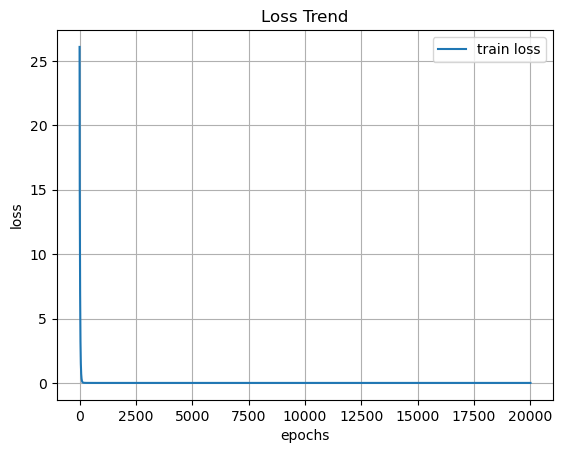

In [33]:
## 손실함수 최적화 그래프

import matplotlib.pyplot as plt

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(loss_list,label='train loss')
plt.legend(loc='best')
plt.show()

### 3.2 모델 파라미터 확인

In [17]:
## 모델 파라미터 (가중치,바이어스) 확인
## 학습을 마친 후에 정확하게 가중치를 추정하였음 (2,-3,2)

for name, child in model.named_children():
    for param in child.parameters():
        print(name, param)

linear_stack Parameter containing:
tensor([[ 2.0000, -3.0000,  2.0000]], requires_grad=True)
linear_stack Parameter containing:
tensor([5.1262e-06], requires_grad=True)


### 3.3 테스트 데이터로 평가

In [18]:
## 테스트 데이터 예측하기

x_test = torch.Tensor([ [5, 5, 0], [2, 3, 1], [-1, 0, -1], [10, 5, 2], [4, -1, -2] ])
label = [ 2*data[0] -3*data[1] + 2*data[2]  for data in x_test ]
pred = model(x_test) # 학습 완료된 모델에 테스트 데이터 대입

print(pred)
print('=============================================')
print(label)

tensor([[-5.0000],
        [-3.0000],
        [-4.0000],
        [ 9.0000],
        [ 7.0000]], grad_fn=<AddmmBackward0>)
[tensor(-5.), tensor(-3.), tensor(-4.), tensor(9.), tensor(7.)]
